# 

::: {#cell-0 .cell 0=‘h’ 1=‘i’ 2=‘d’ 3=‘e’ execution_count=1}

``` python
%load_ext autoreload
%autoreload 2
```

:::

In [4]:
from ids_finder.core.pipeline import ids_finder
from ids_finder.datasets import IDsDataset
from ids_finder.utils.basic import resample
from ids_finder.integration import combine_features, calc_combined_features
from space_analysis.missions.psp.mag import load_data
from space_analysis.missions.psp.plasma import load_data as load_data_plasma
import polars as pl
from beforerr.polars import pl_norm
# from ids_finder.missions.psp.mag import load_data, download_data

In [5]:
from sunpy.time import TimeRange
from datetime import timedelta

In [6]:
start = '2019-04-06T12:00'
end = '2019-04-07T12:00'

earth_start = '2019-04-09'
earth_end = '2019-04-14'

In [7]:
psp_timerange = TimeRange(start, end)
timerange_earth = TimeRange(earth_start, earth_end)

In [8]:
def validate(timerange):
    if isinstance(timerange, TimeRange):
        return [timerange.start.to_string(), timerange.end.to_string()]

In [9]:
# tau = timedelta(seconds=60)
tau = timedelta(seconds=10)
ts = timedelta(seconds=1/264)

In [10]:
validate(psp_timerange)

[ '2019-04-06T12:00:00.000' , '2019-04-07T12:00:00.000' ]

In [11]:
data = load_data(trange = validate(psp_timerange))

30-Jan-24 20:56:33 INFO 30 -Jan- 24 20:56:33 : Downloading remote index: download.py : 343 
 https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn/2019/

30-Jan-24 20:56:34 INFO 30 -Jan- 24 20:56:34 : File is current: download.py : 140 
 /Users/zijin/data/psp/fields/l2/mag_rtn/2019/ psp_fld_l2_mag_rtn_2019040 
 612_v02.cdf

INFO 30 -Jan- 24 20:56:34 : File is current: download.py : 140 
 /Users/zijin/data/psp/fields/l2/mag_rtn/2019/ psp_fld_l2_mag_rtn_2019040 
 618_v02.cdf

INFO 30 -Jan- 24 20:56:34 : File is current: download.py : 140 
 /Users/zijin/data/psp/fields/l2/mag_rtn/2019/ psp_fld_l2_mag_rtn_2019040 
 700_v02.cdf

INFO 30 -Jan- 24 20:56:34 : File is current: download.py : 140 
 /Users/zijin/data/psp/fields/l2/mag_rtn/2019/ psp_fld_l2_mag_rtn_2019040 
 706_v02.cdf

In [12]:
candidate = ids_finder(data, tau, ts)

30-Jan-24 20:56:38 WARNING 30 -Jan- 24 20:56:38 : UserWarning: Converting non-nanosecond precision logger.py : 205 
 datetime values to nanosecond precision. This behavior can eventually be 
 relaxed in xarray, as it is an artifact from pandas which is now 
 beginning to support non-nanosecond precision values. This warning is 
 caused by passing non-nanosecond np.datetime64 or np.timedelta64 values 
 to the DataArray or Variable constructor; it can be silenced by 
 converting the values to nanosecond precision ahead of time.

WARNING 30 -Jan- 24 20:56:38 : UserWarning: Ray execution environment not yet logger.py : 205 
 initialized. Initializing ... 
 To remove this warning, run the following python code before doing 
 dataframe operations: 
 
 import ray 
 ray.init ()

2024-01-30 20:56:40,397 INFO worker.py:1724 -- Started a local Ray instance.
(_deploy_ray_func pid=21291) UserWarning: Traceback (most recent call last):
(_deploy_ray_func pid=21291)   File "/Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/pdpipe/__init__.py", line 85, in <module>
(_deploy_ray_func pid=21291)     from . import skintegrate
(_deploy_ray_func pid=21291)   File "/Users/zijin/micromamba/envs/psp_conjunction/lib/python3.11/site-packages/pdpipe/skintegrate.py", line 20, in <module>
(_deploy_ray_func pid=21291)     from sklearn.base import BaseEstimator
(_deploy_ray_func pid=21291) ModuleNotFoundError: No module named 'sklearn'
(_deploy_ray_func pid=21291) 
(_deploy_ray_func pid=21291) UserWarning: pdpipe: Scikit-learn or skutil import failed. Scikit-learn-dependent pipeline stages will not be loaded.
(_deploy_ray_func pid=21291) UserWarning: Traceback (most recent call last):
(_deploy_ray_func pid=21291)   File "/Users/zijin/micromamba/envs/psp_conjun

30-Jan-24 20:56:41 WARNING 30 -Jan- 24 20:56:41 : UserWarning: Distributing < class logger.py : 205 
 'pandas.core.frame.DataFrame' > object. This may take some time.

INFO 30 -Jan- 24 20:56:41 : Using sequential splitting in partition_manager.py : 89 
 '.from_pandas()' because of some of the conditions are False : 
 enough_elements = False ; all_numeric_types = False ; 
 async_mode_on = False

30-Jan-24 20:56:42 INFO 30 -Jan- 24 20:56:42 : Using sequential splitting in partition_manager.py : 89 
 '.from_pandas()' because of some of the conditions are False : 
 enough_elements = False ; all_numeric_types = False ; 
 async_mode_on = False

INFO 30 -Jan- 24 20:56:42 : Using sequential splitting in partition_manager.py : 89 
 '.from_pandas()' because of some of the conditions are False : 
 enough_elements = False ; all_numeric_types = True ; 
 async_mode_on = False

INFO 30 -Jan- 24 20:56:42 : Using sequential splitting in partition_manager.py : 89 
 '.from_pandas()' because of some of the conditions are False : 
 enough_elements = False ; all_numeric_types = False ; 
 async_mode_on = False

In [13]:
psp_ids_dataset = IDsDataset(
    candidates = candidate,
    data = data
)

Examples of discontinuities observed by PSP

``` python
# psp_ids_dataset.plot_candidates()
good_indices = [87, 285, 121, 128, 69, 282, 81]
figs = psp_ids_dataset.plot_candidates(good_indices, display=False)
```

<table style="width:100%;">
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<tbody>
<tr class="odd">
<td style="text-align: left;"><div width="33.3%"
data-layout-align="left">
<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"></pre>
</div></td>
<td style="text-align: center;"><div width="33.3%"
data-layout-align="center">
<p>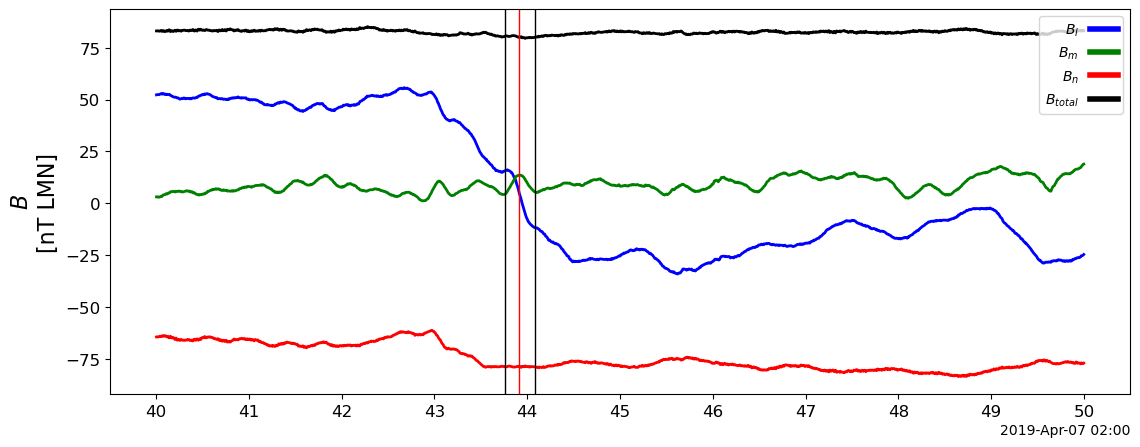</p>
</div></td>
<td style="text-align: left;"><div width="33.3%"
data-layout-align="left">
<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"></pre>
</div></td>
</tr>
</tbody>
</table>

<table style="width:100%;">
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<tbody>
<tr class="odd">
<td style="text-align: center;"><div width="33.3%"
data-layout-align="center">
<p>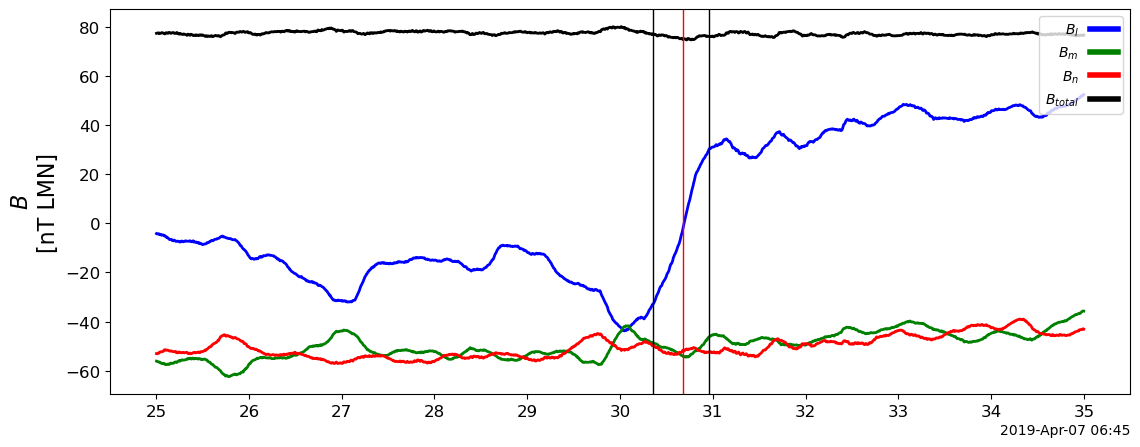</p>
</div></td>
<td style="text-align: left;"><div width="33.3%"
data-layout-align="left">
<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"></pre>
</div></td>
<td style="text-align: center;"><div width="33.3%"
data-layout-align="center">
<p>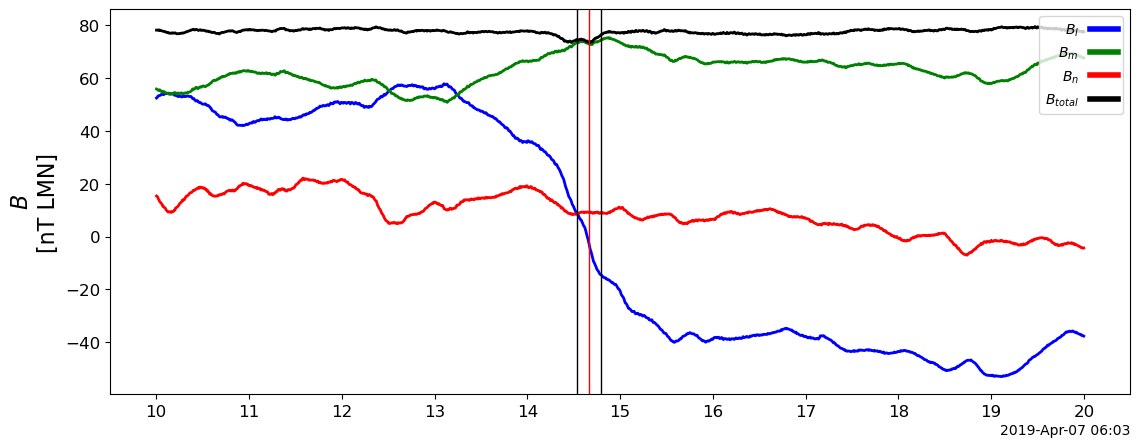</p>
</div></td>
</tr>
</tbody>
</table>

<table style="width:100%;">
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<tbody>
<tr class="odd">
<td style="text-align: left;"><div width="33.3%"
data-layout-align="left">
<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"></pre>
</div></td>
<td style="text-align: center;"><div width="33.3%"
data-layout-align="center">
<p>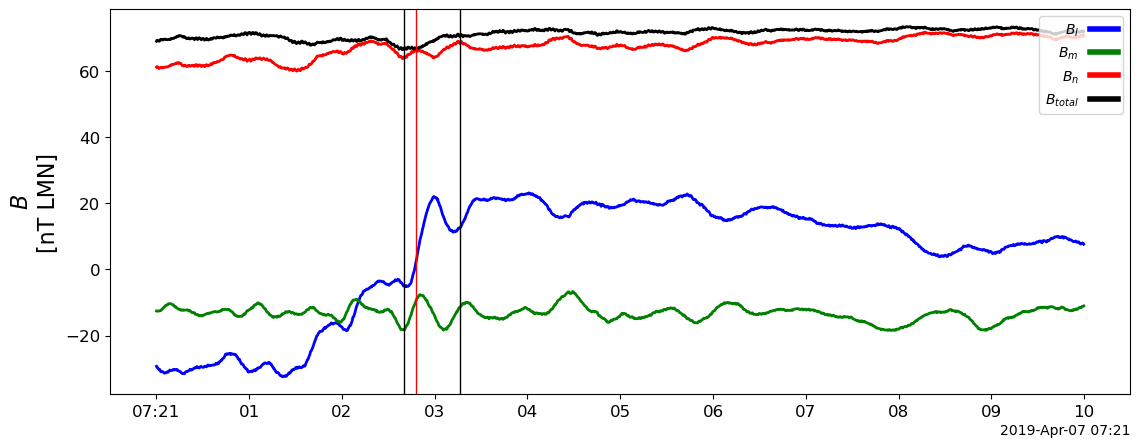</p>
</div></td>
<td style="text-align: left;"><div width="33.3%"
data-layout-align="left">
<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"></pre>
</div></td>
</tr>
</tbody>
</table>

<table style="width:100%;">
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<tbody>
<tr class="odd">
<td style="text-align: center;"><div width="33.3%"
data-layout-align="center">
<p>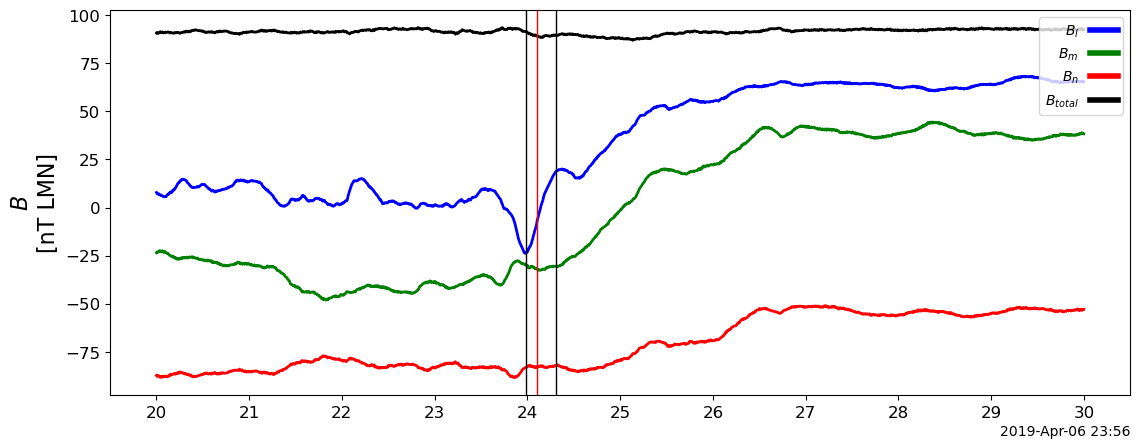</p>
</div></td>
<td style="text-align: left;"><div width="33.3%"
data-layout-align="left">
<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"></pre>
</div></td>
<td style="text-align: center;"><div width="33.3%"
data-layout-align="center">
<p>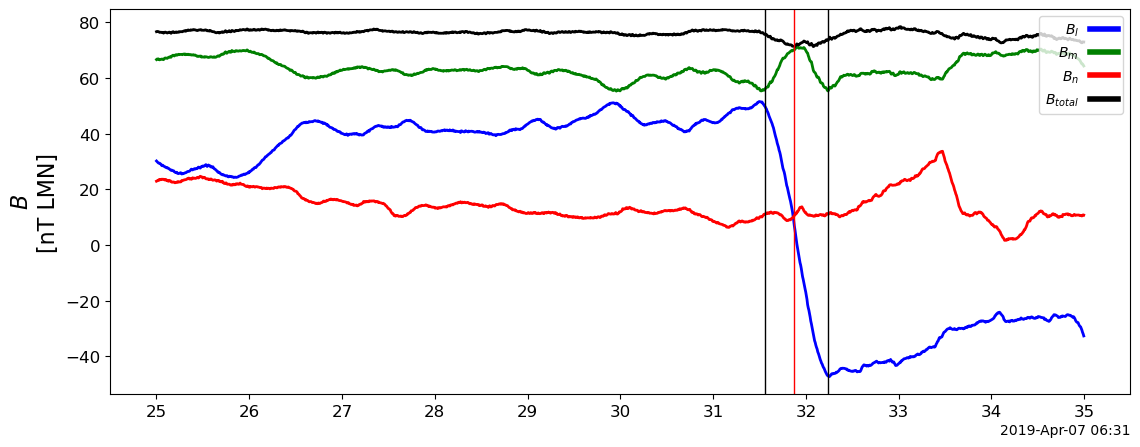</p>
</div></td>
</tr>
</tbody>
</table>

<table style="width:67%;">
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<tbody>
<tr class="odd">
<td style="text-align: left;"><div width="33.3%"
data-layout-align="left">
<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"></pre>
</div></td>
<td style="text-align: center;"><div width="33.3%"
data-layout-align="center">
<p>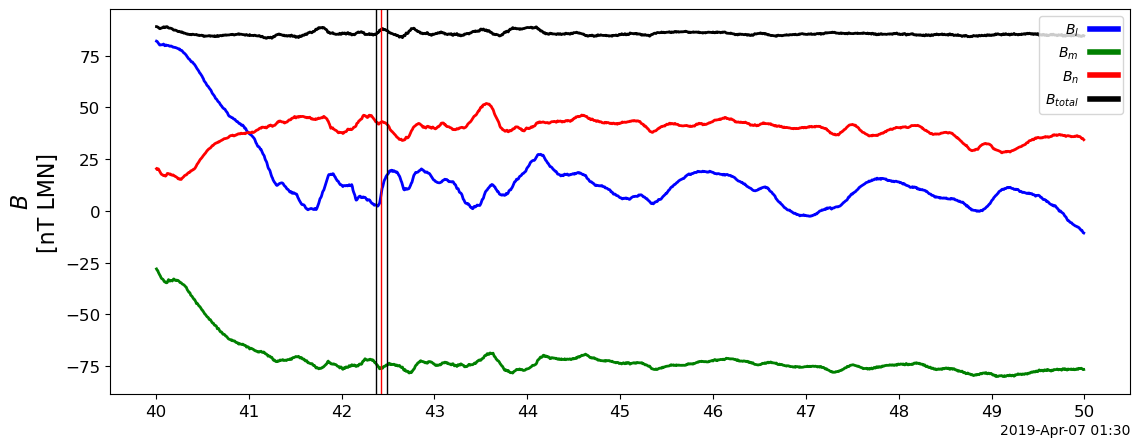</p>
</div></td>
</tr>
</tbody>
</table>

By visually inspecting data, the most strong discontinuities kind of
have time duration about 1-3 seconds. So it is reasonable to downsample
the data to a lower frequency so that

-   the detection method is more robust, excluding very high frequency
    wave/noise?
-   it is better to apply the derivative method to get the properties of
    the discontinuities.
-   Match `Wind` time resolution.

Or we could fit the $B_l$ to get the properties of the discontinuities.

In [15]:
every = timedelta(seconds=1/11)

# tau = timedelta(seconds=60)
tau = timedelta(seconds=10)
ts = timedelta(seconds=1/11)

data_r = resample(data, every)

In [16]:
candidates_r = ids_finder(data_r, tau, ts)

30-Jan-24 20:56:47 WARNING 30 -Jan- 24 20:56:47 : DeprecationWarning: ` pl.count () ` is deprecated. logger.py : 205 
 Please use ` pl.len () ` instead.

WARNING 30 -Jan- 24 20:56:47 : DeprecationWarning: `map_alias` is deprecated. It has logger.py : 205 
 been moved to `name.map`.

WARNING 30 -Jan- 24 20:56:47 : DeprecationWarning: `map_alias` is deprecated. It has logger.py : 205 
 been moved to `name.map`.

30-Jan-24 20:56:49 WARNING 30 -Jan- 24 20:56:49 : UserWarning: Converting non-nanosecond precision logger.py : 205 
 datetime values to nanosecond precision. This behavior can eventually be 
 relaxed in xarray, as it is an artifact from pandas which is now 
 beginning to support non-nanosecond precision values. This warning is 
 caused by passing non-nanosecond np.datetime64 or np.timedelta64 values 
 to the DataArray or Variable constructor; it can be silenced by 
 converting the values to nanosecond precision ahead of time.

WARNING 30 -Jan- 24 20:56:49 : UserWarning: Distributing < class logger.py : 205 
 'pandas.core.frame.DataFrame' > object. This may take some time.

INFO 30 -Jan- 24 20:56:49 : Using sequential splitting in partition_manager.py : 89 
 '.from_pandas()' because of some of the conditions are False : 
 enough_elements = False ; all_numeric_types = False ; 
 async_mode_on = False

30-Jan-24 20:56:50 INFO 30 -Jan- 24 20:56:50 : Using sequential splitting in partition_manager.py : 89 
 '.from_pandas()' because of some of the conditions are False : 
 enough_elements = False ; all_numeric_types = False ; 
 async_mode_on = False

INFO 30 -Jan- 24 20:56:50 : Using sequential splitting in partition_manager.py : 89 
 '.from_pandas()' because of some of the conditions are False : 
 enough_elements = False ; all_numeric_types = True ; 
 async_mode_on = False

INFO 30 -Jan- 24 20:56:50 : Using sequential splitting in partition_manager.py : 89 
 '.from_pandas()' because of some of the conditions are False : 
 enough_elements = False ; all_numeric_types = False ; 
 async_mode_on = False

In [17]:
var_names = ["DENS", "VEL_RTN_SUN", "TEMP", "SUN_DIST"]
vec_cols=[f"VEL_RTN_SUN_{i}" for i in range(3)]

psp_plasma = load_data_plasma(trange = validate(psp_timerange), var_names=var_names)
psp_plasma_r = psp_plasma.pipe(resample, every=tau).with_columns(
    plasma_speed = pl_norm(vec_cols)
).rename({
    "DENS": "plasma_density",
    "TEMP": "plasma_temperature",
})

Using LEVEL=L3

INFO 30 -Jan- 24 20:56:50 : Downloading remote index: download.py : 343 
 https://spdf.gsfc.nasa.gov/pub/data/psp/sweap/spi/l3/spi_sf00_l3_mom/20 
 19/

INFO 30 -Jan- 24 20:56:50 : File is current: download.py : 140 
 /Users/zijin/data/psp/sweap/spi/l3/spi_sf00_l3_mom/2019/ psp_swp_spi_sf0 
 0_l3_mom_20190406_v04.cdf

INFO 30 -Jan- 24 20:56:50 : File is current: download.py : 140 
 /Users/zijin/data/psp/sweap/spi/l3/spi_sf00_l3_mom/2019/ psp_swp_spi_sf0 
 0_l3_mom_20190407_v04.cdf

In [18]:
psp_ids_dataset = IDsDataset(
    candidates = candidates_r.filter(pl.col('index_diff')>1),
    data = data_r,
    plasma_data = psp_plasma_r,
    vec_cols = vec_cols
)

psp_ids_dataset.update_candidates_with_plasma_data()

30-Jan-24 20:56:51 WARNING 30 -Jan- 24 20:56:51 : PendingDeprecationWarning: The `dims` argument has logger.py : 205 
 been renamed to `dim`, and will be removed in the future. This renaming 
 is taking place throughout xarray over the next few releases.

WARNING 30 -Jan- 24 20:56:51 : PendingDeprecationWarning: The `dims` argument has logger.py : 205 
 been renamed to `dim`, and will be removed in the future. This renaming 
 is taking place throughout xarray over the next few releases.

WARNING 30 -Jan- 24 20:56:51 : PendingDeprecationWarning: The `dims` argument has logger.py : 205 
 been renamed to `dim`, and will be removed in the future. This renaming 
 is taking place throughout xarray over the next few releases.

WARNING 30 -Jan- 24 20:56:51 : DeprecationWarning: `nanoseconds` is deprecated. It logger.py : 205 
 has been renamed to `total_nanoseconds`.

WARNING 30 -Jan- 24 20:56:51 : DeprecationWarning: `nanoseconds` is deprecated. It logger.py : 205 
 has been renamed to `total_nanoseconds`.

WARNING 30 -Jan- 24 20:56:51 : DeprecationWarning: `nanoseconds` is deprecated. It logger.py : 205 
 has been renamed to `total_nanoseconds`.

2024-01-30 21:21:55.968 | INFO     | ids_finder.datasets:plot_candidates:67 - Candidates indices: [9, 3, 11, 10]

30-Jan-24 21:21:56 WARNING 30 -Jan- 24 21:21:56 : UserWarning: Converting non-nanosecond precision logger.py : 205 
 datetime values to nanosecond precision. This behavior can eventually be 
 relaxed in xarray, as it is an artifact from pandas which is now 
 beginning to support non-nanosecond precision values. This warning is 
 caused by passing non-nanosecond np.datetime64 or np.timedelta64 values 
 to the DataArray or Variable constructor; it can be silenced by 
 converting the values to nanosecond precision ahead of time.

WARNING 30 -Jan- 24 21:21:56 : UserWarning: Converting non-nanosecond precision logger.py : 205 
 datetime values to nanosecond precision. This behavior can eventually be 
 relaxed in xarray, as it is an artifact from pandas which is now 
 beginning to support non-nanosecond precision values. This warning is 
 caused by passing non-nanosecond np.datetime64 or np.timedelta64 values 
 to the DataArray or Variable constructor; it can be silenced by 
 converting the values to nanosecond precision ahead of time.

WARNING 30 -Jan- 24 21:21:56 : UserWarning: Converting non-nanosecond precision logger.py : 205 
 datetime values to nanosecond precision. This behavior can eventually be 
 relaxed in xarray, as it is an artifact from pandas which is now 
 beginning to support non-nanosecond precision values. This warning is 
 caused by passing non-nanosecond np.datetime64 or np.timedelta64 values 
 to the DataArray or Variable constructor; it can be silenced by 
 converting the values to nanosecond precision ahead of time.

30-Jan-24 21:21:57 WARNING 30 -Jan- 24 21:21:57 : UserWarning: Converting non-nanosecond precision logger.py : 205 
 datetime values to nanosecond precision. This behavior can eventually be 
 relaxed in xarray, as it is an artifact from pandas which is now 
 beginning to support non-nanosecond precision values. This warning is 
 caused by passing non-nanosecond np.datetime64 or np.timedelta64 values 
 to the DataArray or Variable constructor; it can be silenced by 
 converting the values to nanosecond precision ahead of time.

[ 
 ( 
 < Figure size 120 0x500 with 1 Axes>,
 <Axes: title = { 'center' : '$V_i: 380.32 \\mathrm { km/s } $, $n_i: 95.51 \\mathrm { cm } ^ { -3 } $, $T_i: 56.84 \\mathrm { eV } $' } , ylabel = '$B$\n [ nT LMN ] ' >
 ) ,
 ( 
 <Figure size 120 0x500 with 1 Axes>,
 <Axes: title = { 'center' : '$V_i: 392.90 \\mathrm { km/s } $, $n_i: 119.73 \\mathrm { cm } ^ { -3 } $, $T_i: 42.46 \\mathrm { eV } $' } , ylabel = '$B$\n [ nT LMN ] ' >
 ) ,
 ( 
 <Figure size 120 0x500 with 1 Axes>,
 <Axes: title = { 'center' : '$V_i: 357.01 \\mathrm { km/s } $, $n_i: 93.86 \\mathrm { cm } ^ { -3 } $, $T_i: 55.01 \\mathrm { eV } $' } , ylabel = '$B$\n [ nT LMN ] ' >
 ) ,
 ( 
 <Figure size 120 0x500 with 1 Axes>,
 <Axes: title = { 'center' : '$V_i: 362.94 \\mathrm { km/s } $, $n_i: 106.27 \\mathrm { cm } ^ { -3 } $, $T_i: 51.21 \\mathrm { eV } $' } , ylabel = '$B$\n [ nT LMN ] ' > 
 ) 
 ]

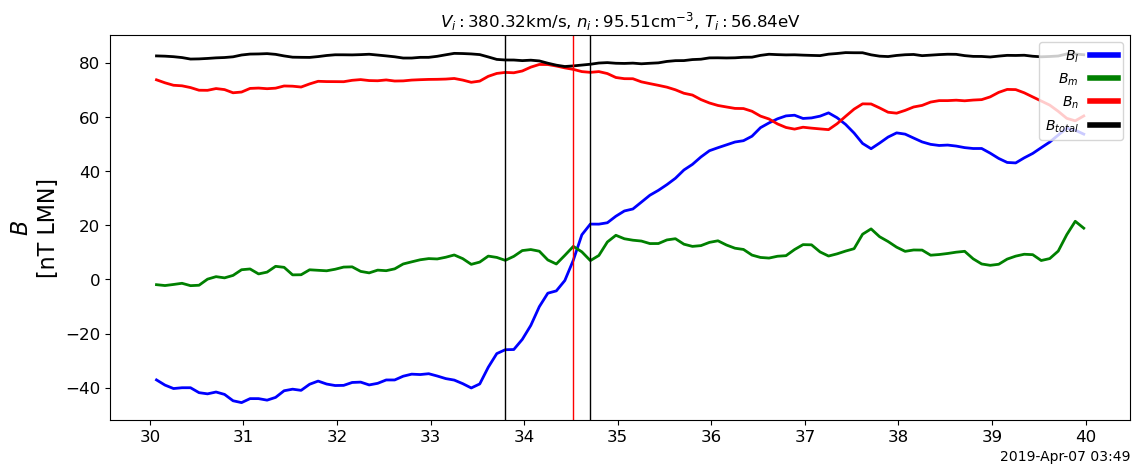

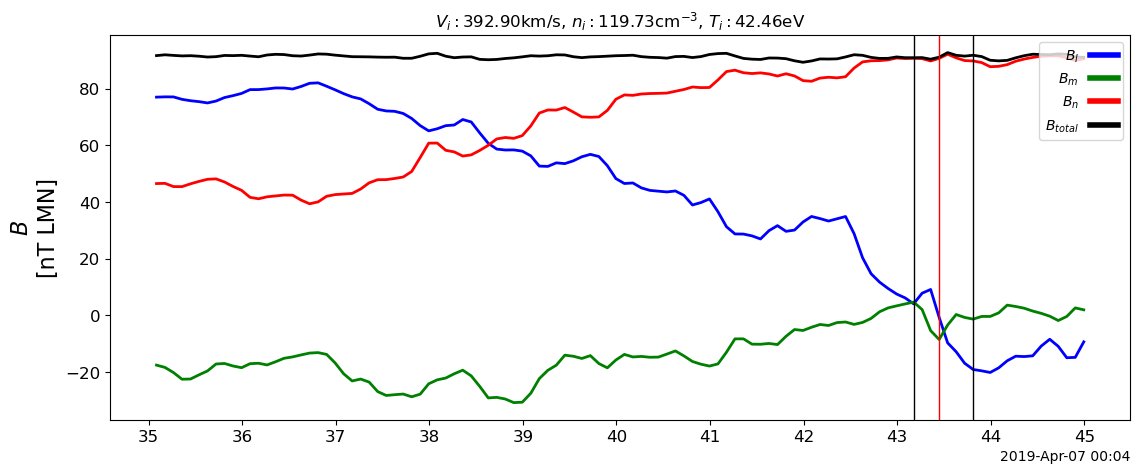

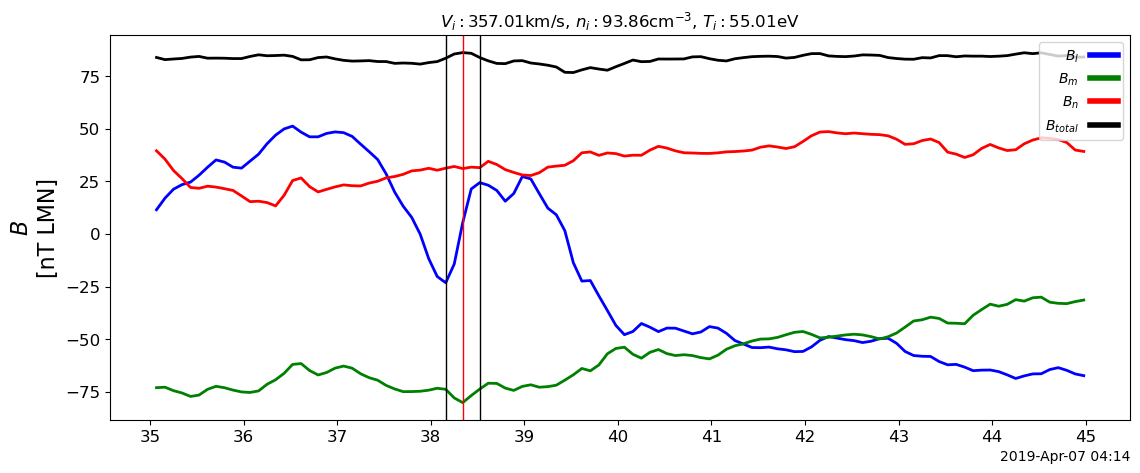

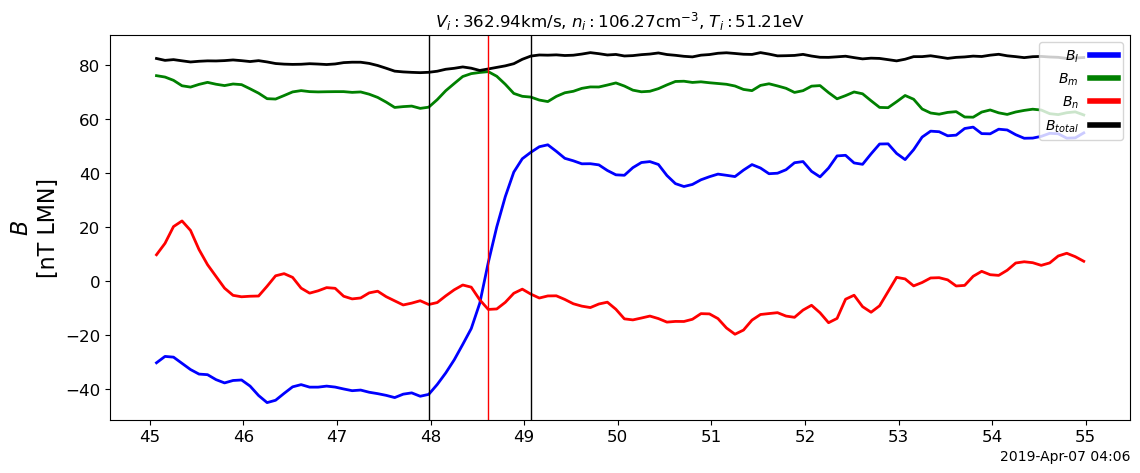

In [29]:
psp_ids_dataset.plot_candidates(add_plasma_params=True)